# Welcome to Tutorial 2!


---

####  **This tutorial shall explore the Environment of [Episimmer](https://github.com/healthbadge/episimmer/tree/master).**



##### Let us perform some initialization first.

In [1]:
!sudo apt install python3.9 python3.9-venv python3.9-distutils
!curl https://bootstrap.pypa.io/get-pip.py | python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!python3.9 --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-lib2to3 python3.9-minimal
Suggested packages:
  binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-distutils
  python3.9-lib2to3 python3.9-minimal python3.9-venv
0 upgraded, 7 newly installed, 0 to remove and 34 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.22-1+jammy1 [837 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.22-1+jammy1 [2,072 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-stdlib amd64 3.9.22-1+jammy1 [1,844 kB]
Get:4

In [2]:
!python3.9 -m pip install episimmer
!git clone https://github.com/healthbadge/episimmer.git
%cd episimmer
from google.colab.patches import cv2, cv2_imshow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 141.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29/29 [episimmer]
Cloning into 'episimmer'...
remote: Enumerating objects: 6534, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 6534 (delta 242), reused 301 (delta 237), pack-reuse

# Environment

---

### *To recap*



The basic components of Episimmer's environment are :

1. *Agents* :
Agent form the core of the simulation. They represent the human population in the simulation that carries disease. They can have attributes like age, blood type, sex etc. In standard SIR models agents are assumed to be homogenous.

2. *Individual Interactions* : An individual/simple interaction in Episimmer is the connecting interaction between two agents. If agents are the vertices of a graph, the interactions represent the edges.

3. *Events* and *Locations* : Events are another type of interactions where they occur at a location. When you have a scenario with all agents interacting with each other, you should use Events. In graph terms, they represent a complete graph of Individual interactions.

*Events and Interactions are periodic in nature. If you have 3 events and 15 timesteps, you will cycle through these 3 events 5 times.*

Additional components (derivatives) :

4. *Probabilistic Interactions* : Derivative of the individual interactions. Here, you can define a set of agents and a probability of interaction between two agents. Probabilistic Interactions are also periodic in nature.

5. *One time event* - Derivative of Events. A one-time event is an event that takes place on only specified time steps. Thus, no cycling of events takes place in one time events.



---

The following concepts show you the basics of an environments in Episimmer. Please refer to the [documentation](https://episimmer.readthedocs.io/en/latest/userguide/environment.html) for more information.


### Agents

The agents are the carriers of the disease. Let us look at how we can create agents in Episimmer.

To do so, we must create an agents text file containing the number of agents, the parameters of the agent and then the actual information of the agents, all on separate lines. We can also create a similar csv file but we shall stick to text files in this tutorial.

The agents file must have the parameter 'Agent Index' to uniquely identify each agent.

A simple example of the agents text file is shown below
```
10
Agent Index
0
1
2
3
4
5
6
7
8
9
```


### Individual Interactions

Interactions are simply representing a single connection between two agents. The disease can flow in only one direction and is thus unidirectional.

For each interaction, the contacted agent will receive a probability of infection.

Let us look at how we can create interactions in Episimmer.

We must create an interactions text file containing the number of interactions, the parameters of the interaction and then the actual information of the interactions, all on separate lines. We can also create a similar csv file but we shall stick to text files in this tutorial.

Each interaction must have the parameters 'Agent Index' and 'Interacting Agent Index'.

A simple example of the interactions_list text file is shown below
```
9
Agent Index:Interacting Agent Index
0:1
0:2
0:3
0:4
0:5
0:6
0:7
0:8
0:9
```


### Events

Events occur at a location in two stages. First, all the infected agents of the location contribute to a medium called ambient infection. Then, the susceptible agents are infected by this accumulated ambient infection.

Similar to Individual interactions, each susceptible agent receives a probability of infection for every event.

Events are efficient as we need to make only one pass over the agents for each stage to calculate all the probabilities for the event. Thus modelling them as interactions would be inefficient.

When we model Individual interactions as an event, we will have
$\frac{n (n-1)}{2}$ edges and thus $n (n-1)$ individual interactions (as these interactions are unidirectional) whose probabilities we must calculate. Time complexity wise, Events run in $O(n)$ time compared to $O(n^2)$ time for interactions. The downside to higher efficiency in Events is that we save only one probability value regardless of the number of agents in the event. This could be a costly assumption
when we have heterogeneous agents and the accumulated ambient infection isn't representative of all the agents. Thus, both Events and Individual interactions have their pros and cons.

Let us look at how we can create events in Episimmer.

We must create an events text file containing the number of events, the parameters of the event and then the actual information of the events, all on separate lines.

Each event must have the parameters 'Location Index' and 'Agents'.

A simple example of the events text file is shown below
```
1
Location Index:Agents
0:0,1,2,3,4,5,6,7,8,9
```

---


Now let us run a few elements of the Environment

In [3]:
# Some helper functions
def read_file(file_name, len=None):
  if len is None:
    with open(file_name) as f:
      print(f.read())
  else:
    i=0
    with open(file_name) as f:
      while i < len:
        print(f.readline(), end='')
        i += 1

### 1. Individual Interactions

Let us use the example Stochastic_SIR_random_graph to showcase interactions.

This example has 90 interactions but we will print only the first few.

In [4]:
!mkdir interactions_example
!cp -a examples/Interaction_Spaces/Stochastic_SIR_random_graph/. interactions_example/
read_file("interactions_example/interactions_list.txt", 10)


90
Agent Index:Interacting Agent Index
1:15
15:1
4:47
47:4
4:74
74:4
4:96
96:4


Let us now run the example to get the epidemic trajectory

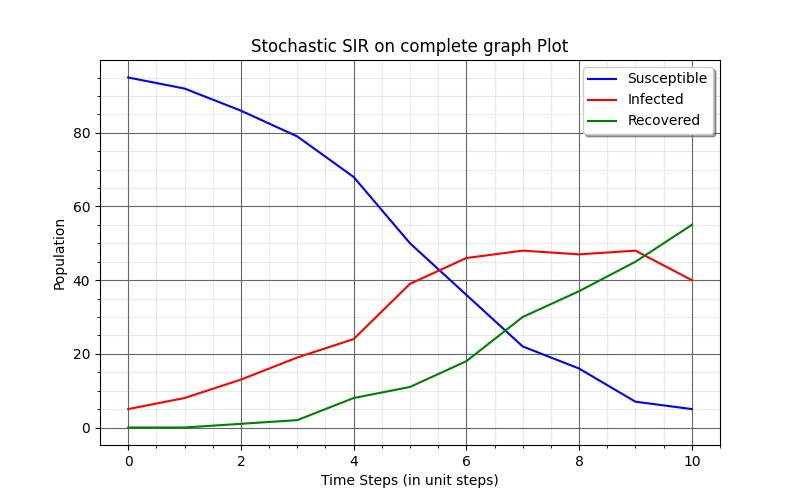

In [5]:
!python3.9 episimmer/main.py interactions_example -np
cv2_imshow(cv2.imread("interactions_example/results/results.jpg"))

### 2. Events

Let us use the example Stochastic_SIR to showcase events. It has 1000 agents and a single event with all the agents. Let us ease computation here and generate files with only 500 agents and a single event.

In [6]:
!mkdir events_example
!cp -a examples/Basic_Disease_Models/Stochastic_SIR/. events_example/
%cd events_example/
!python3 generate_files.py 500
%cd ..


/content/episimmer/events_example
/content/episimmer


In [7]:
read_file("events_example/one_event.txt")

1
Location Index:Agents
0:0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,

Let us now run the example to get the epidemic trajectory

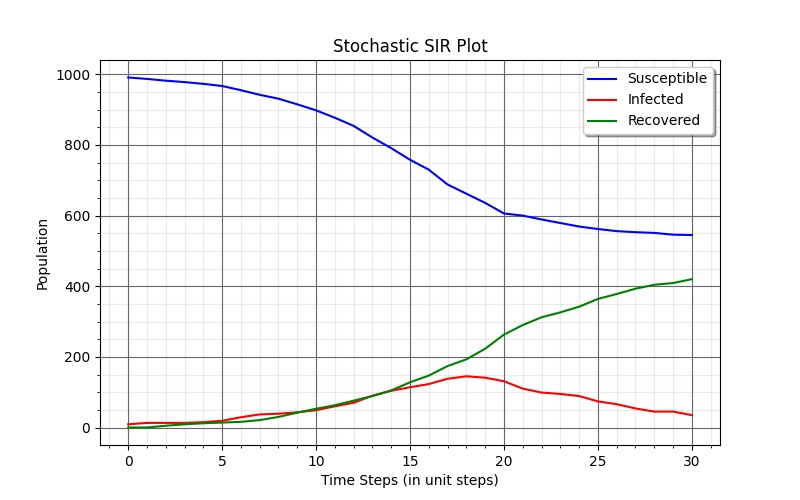

In [8]:
!python3.9 episimmer/main.py events_example -np
cv2_imshow(cv2.imread("events_example/results/results.jpg"))

### 3. Events vs Individual Interactions

Let us now model an Event with Individual interactions.

We can use the example Stochastic_SIR_complete_graph for this. It has agents all connected to each other with the help of Individual interactions. This is practically modelling an Event.

This example has 20 agents currently so we will use the generate file to get a 500 agents. As mentioned above, the number of interactions for n agents in a complete graph would be $n (n-1)$. Thus for 500 agents, we would have $500 \times 499 = 249500$ interactions.

In [9]:
!mkdir interactions_complete_graph
!cp -a examples/Interaction_Spaces/Stochastic_SIR_complete_graph/. interactions_complete_graph/
%cd interactions_complete_graph/
!python3 generate_files.py 500
%cd ..

/content/episimmer/interactions_complete_graph
/content/episimmer


In [10]:
read_file("interactions_complete_graph/complete_interactions_list.txt", 20)

249500
Agent Index:Interacting Agent Index
0:1
0:2
0:3
0:4
0:5
0:6
0:7
0:8
0:9
0:10
0:11
0:12
0:13
0:14
0:15
0:16
0:17
0:18


Now let us time their runs for comparison.

In [12]:
import time

#Event run
start = time.time()
!python3.9 episimmer/main.py events_example -np &> /dev/null
print("Single Event took : {0:.2f} s".format(time.time()-start))

# Complete interactions run
start = time.time()
!python3.9 episimmer/main.py interactions_complete_graph -np &> /dev/null
print("Complete graph Interactions took : {0:.2f} s".format(time.time()-start))

Single Event took : 1.41 s
Complete graph Interactions took : 28.50 s


The difference in efficiency is huge as shown by the time taken. That is why it is very important to always use events when you have multiple agents interacting with each other and we do not have the information of the Individual interactions.

### 4. Complex Agent attributes

For agents, we show an example of how different attributes can be present in the agents file. For that, we shall use the Example_1 example

In [13]:
# !mkdir agents_showcase
!cp -a examples/Basic_Disease_Models/Example_1/. agents_showcase/
read_file("agents_showcase/agents.txt", 20)

100
Agent Index:Type:Residence:HLA Type
0:Visitor:Outside:B
1:Visitor:Teacher Dorm:C
2:Visitor:Outside:C
3:Staff:Teacher Dorm:A
4:Student:Dorm A:A
5:Visitor:Dorm A:B
6:Administration:Teacher Dorm:C
7:Staff:Teacher Dorm:C
8:Staff:Outside:A
9:Teacher:Dorm B:B
10:Visitor:Teacher Dorm:C
11:Administration:Outside:B
12:Visitor:Outside:C
13:Staff:Outside:B
14:Staff:Dorm A:B
15:Visitor:Teacher Dorm:B
16:Staff:Outside:A
17:Staff:Dorm A:B


These attributes can easily be used to change the behaviour of agents in the environment and also how the environment can affect the agents.

### Disclaimer : These colab tutorials are only for reference and they are in no way representative of the entire functionality of Episimmer. Please look at the [Documentation](https://episimmer.readthedocs.io/en/latest/) for more details.